Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024.
Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('Nat_Gas.csv')

In [4]:
data.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


C:\Users\niran\AppData\Local\Temp\ipykernel_1752\3363745921.py:13: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  dates_smooth = data['Dates'].min() + pd.TimedeltaIndex(x_smooth, unit='D')


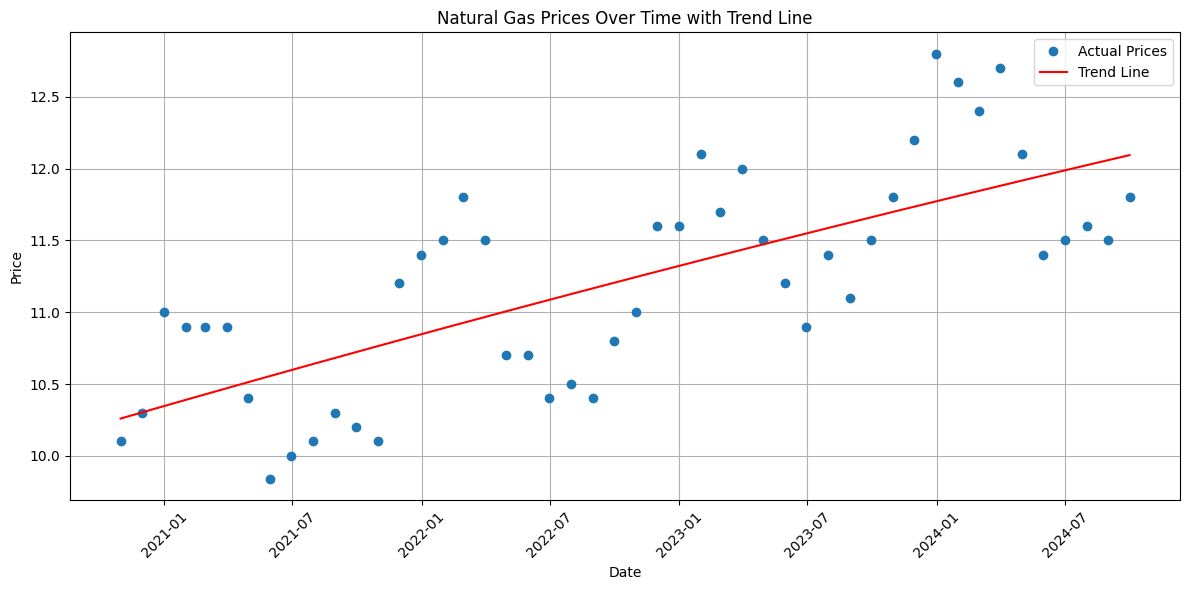

In [11]:
# Convert dates to numerical values for regression
data['Dates'] = pd.to_datetime(data['Dates'])
x_numeric = (data['Dates'] - data['Dates'].min()).dt.days.values.reshape(-1, 1)

# Fit polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x_numeric)
model = LinearRegression()
model.fit(X_poly, data['Prices'])

# Generate points for smooth curve
x_smooth = np.linspace(x_numeric.min(), x_numeric.max(), 500)
dates_smooth = data['Dates'].min() + pd.TimedeltaIndex(x_smooth, unit='D')
y_smooth = model.predict(poly.transform(x_smooth.reshape(-1, 1)))

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(data['Dates'], data['Prices'], 'o', label='Actual Prices')
plt.plot(dates_smooth, y_smooth, 'r-', label='Trend Line')
plt.title('Natural Gas Prices Over Time with Trend Line')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

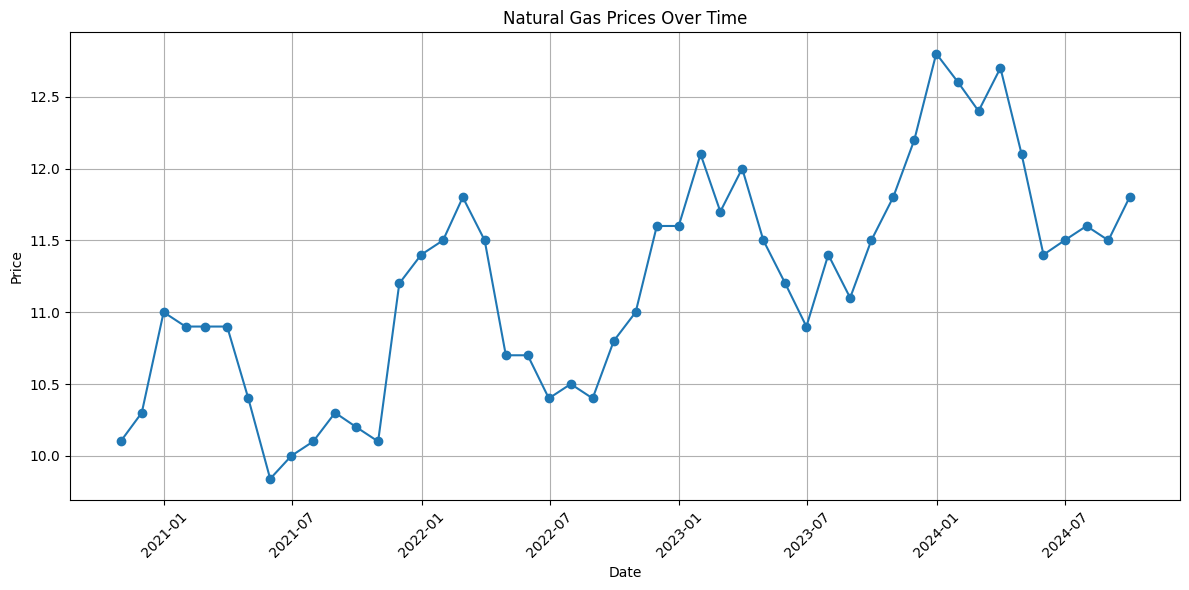

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(data['Dates'], data['Prices'], marker='o')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
#avg prince 
average_price = data['Prices'].mean()

average_price

11.207083333333332

In [13]:
# Yearly average price:
yearly_avg = data.groupby(data['Dates'].dt.year)['Prices'].mean()
yearly_avg

Dates
2020    10.466667
2021    10.520000
2022    11.041667
2023    11.683333
2024    11.955556
Name: Prices, dtype: float64

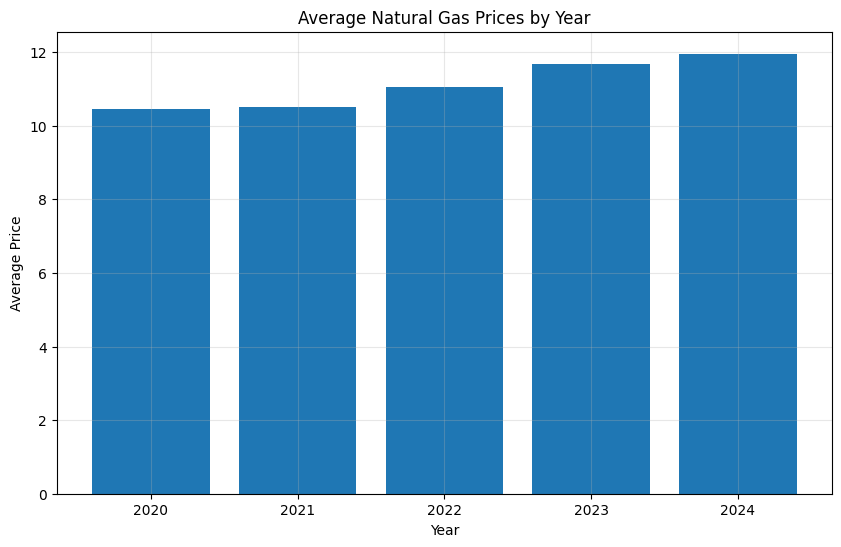

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(yearly_avg.index, yearly_avg.values)
plt.title('Average Natural Gas Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
yearly_avg.diff()

Dates
2020         NaN
2021    0.053333
2022    0.521667
2023    0.641667
2024    0.272222
Name: Prices, dtype: float64

In [19]:
from datetime import datetime
from sklearn.linear_model import LinearRegression
import io

In [20]:
df = data

In [21]:

df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
df['Date_ordinal'] = df['Dates'].map(datetime.toordinal)

# Fit linear regression model
X = df['Date_ordinal'].values.reshape(-1, 1)
y = df['Prices'].values
model = LinearRegression().fit(X, y)

# Function to estimate gas price for any date
def estimate_gas_price(date_str):
    d = pd.to_datetime(date_str, format='%m/%d/%y')
    d_ord = d.toordinal()
    return float(model.predict(np.array([[d_ord]])))


In [23]:
# print(estimate_gas_price('03/15/23')) 